## Installing the necessary libraries

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Read the data as a data frame and check out its detailed information

In [52]:
# load the dataset
cars_dataframe = pd.read_csv('Dataset/cars.csv')

In [53]:
# shape of dataset
cars_dataframe.shape

(1725, 11)

In [54]:
# check first five rows
cars_dataframe.head()

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age
0,0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,7,5.0
1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai,11,9.0
2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane,1,4.0
3,3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,4195000.0,25000.0,Diesel,Mumbai,2,4.0
4,4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,475000.0,23800.0,Diesel,Mumbai,14,9.0


In [55]:
# check if null values exists in each column
cars_dataframe.isna().sum()

Id                         0
year                       0
brand                      0
full_model_name            0
model_name                 0
price                      0
distance_travelled(kms)    0
fuel_type                  0
city                       0
brand_rank                 0
car_age                    0
dtype: int64

In [56]:
# display data types of each column
cars_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1725 non-null   int64  
 1   year                     1725 non-null   int64  
 2   brand                    1725 non-null   object 
 3   full_model_name          1725 non-null   object 
 4   model_name               1725 non-null   object 
 5   price                    1725 non-null   float64
 6   distance_travelled(kms)  1725 non-null   float64
 7   fuel_type                1725 non-null   object 
 8   city                     1725 non-null   object 
 9   brand_rank               1725 non-null   int64  
 10  car_age                  1725 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 148.4+ KB


In [57]:
# display statistical measures of numerical columns
cars_dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1725.0,8.620000e+02,4.981089e+02,0.0,431.0,862.0,1293.0,1724.0
year,1725.0,2.015391e+03,3.207504e+00,1990.0,2013.0,2016.0,2018.0,2021.0
price,1725.0,1.494837e+06,1.671658e+06,62500.0,545000.0,875000.0,1825000.0,14700000.0
distance_travelled(kms),1725.0,5.384826e+04,4.472554e+04,350.0,29000.0,49000.0,70500.0,790000.0
brand_rank,1725.0,1.573101e+01,1.295112e+01,1.0,5.0,14.0,24.0,81.0
car_age,1725.0,5.609275e+00,3.207504e+00,0.0,3.0,5.0,8.0,31.0


## Univariate Analysis and Multivariate Analysis

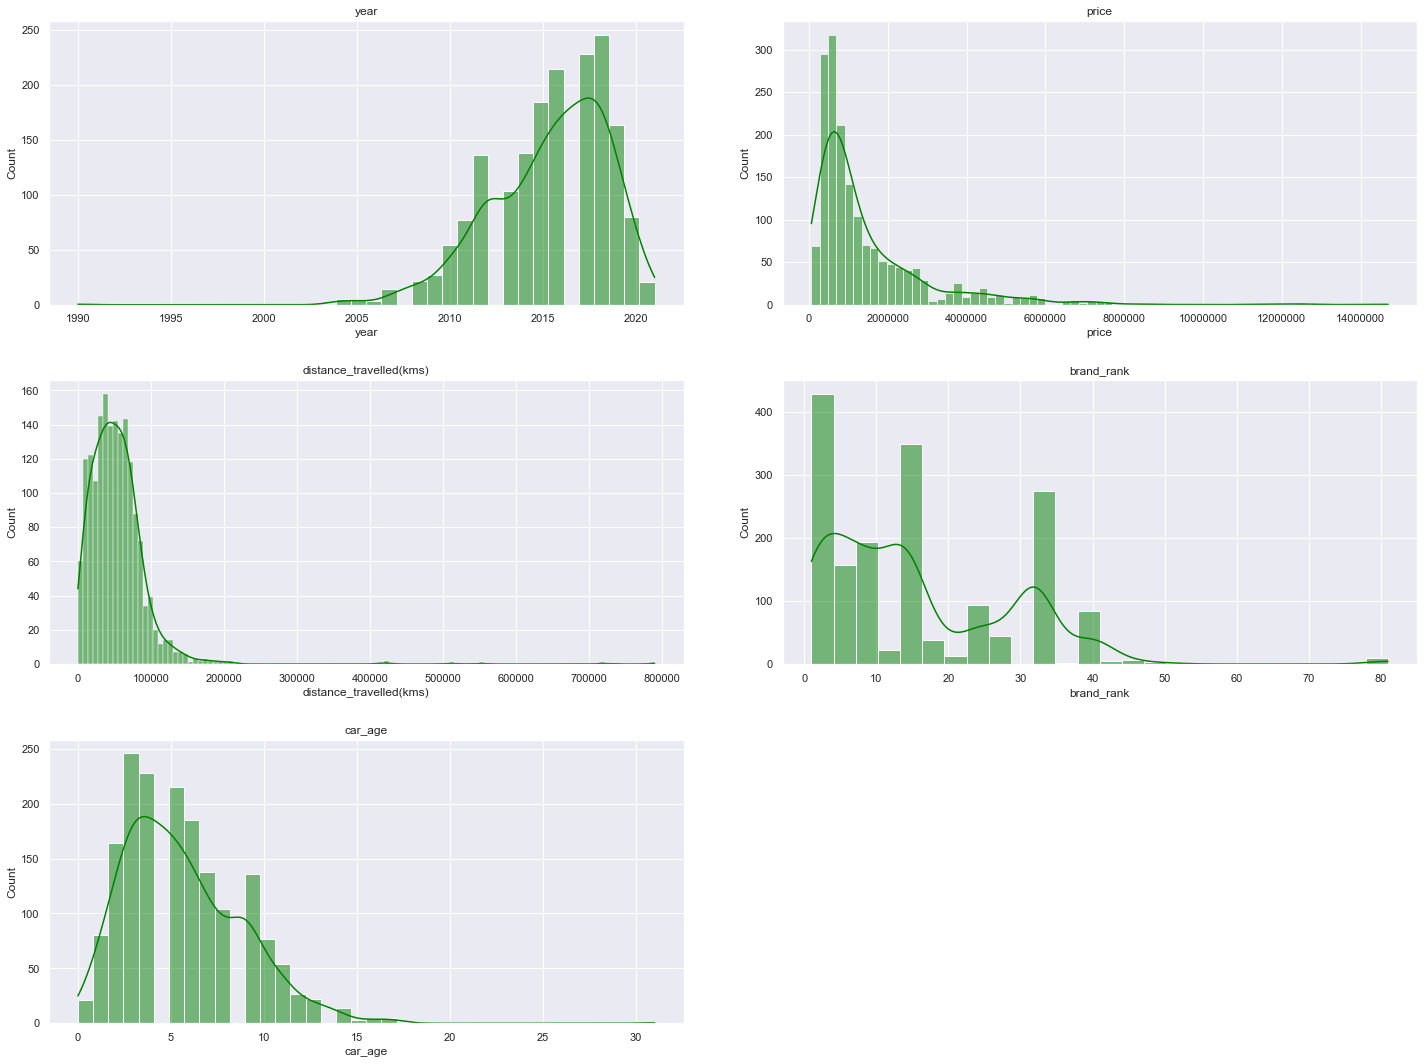

In [58]:
plt.rcParams.update({'font.size': 14})

# univariate analysis
# Distribution of numerical columns 'year', 'price', 'distance_travelled(kms)', 'brand_rank', and 'car_age'

# select only necessary columns
dist_data = cars_dataframe.loc[:, ['year', 'price', 'distance_travelled(kms)', 'brand_rank', 'car_age']]

# display histogram distribution of the selected columns
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
ax = axes.flatten()

for i, col in enumerate(dist_data.columns):
    sns.histplot(dist_data[col], color='green', ax=ax[i], kde=True)
    ax[i].set_title(col)
    # remove scientific notation for both axes (e.g. axis marked with 1e7)
    ax[i].ticklabel_format(style='plain', axis='both')

# last plot will not display (cause having no data to display)
axes[-1, -1].axis('off')
fig.tight_layout(w_pad=4, h_pad=2)
plt.show()

In [59]:
# use skew function to understand the skewness of the each numerical features
dist_data.skew()

year                      -0.941731
price                      3.168926
distance_travelled(kms)    6.854832
brand_rank                 1.192134
car_age                    0.941731
dtype: float64

#### From visualization and skewness computing results above, we can say the following columns: 
* year, moderately negatively skewed.  
* price, highly positively skewed
* distance_travelled(kms), highly positively skewed
* brand_rank, highly negatively skewed.
* car_age, moderately positively skewed

In [60]:
# since columns full_model_name and name are high cardinality categorical features, display their most frequent 
# values

# for column full_model_name, its 10 most frequency values
col = cars_dataframe.full_model_name
col.value_counts()[:10].index.tolist()

['Ford EcoSport Titanium 1.5L TDCi',
 'Toyota Innova Crysta 2.4 VX 8 STR [2016-2020]',
 'Audi Q7 3.0 TDI quattro Premium Plus',
 'Honda City 1.5 S MT',
 'Volkswagen Polo GT TSI',
 'Honda WR-V VX MT Diesel',
 'Hyundai i10 Sportz 1.2 Kappa2',
 'Renault Kwid 1.0 RXT AMT Opt [2016-2019]',
 'BMW 5 Series 520d Luxury Line [2017-2019]',
 'Toyota Innova Crysta 2.4 VX 7 STR [2016-2020]']

In [61]:
# for column model_name, its 10 most frequency values
col = cars_dataframe.model_name
col.value_counts()[:10].index.tolist()

['Creta',
 'Innova',
 'City',
 'Swift',
 'XUV500',
 'Elite',
 'Grand',
 'Verna',
 'EcoSport',
 'Ciaz']

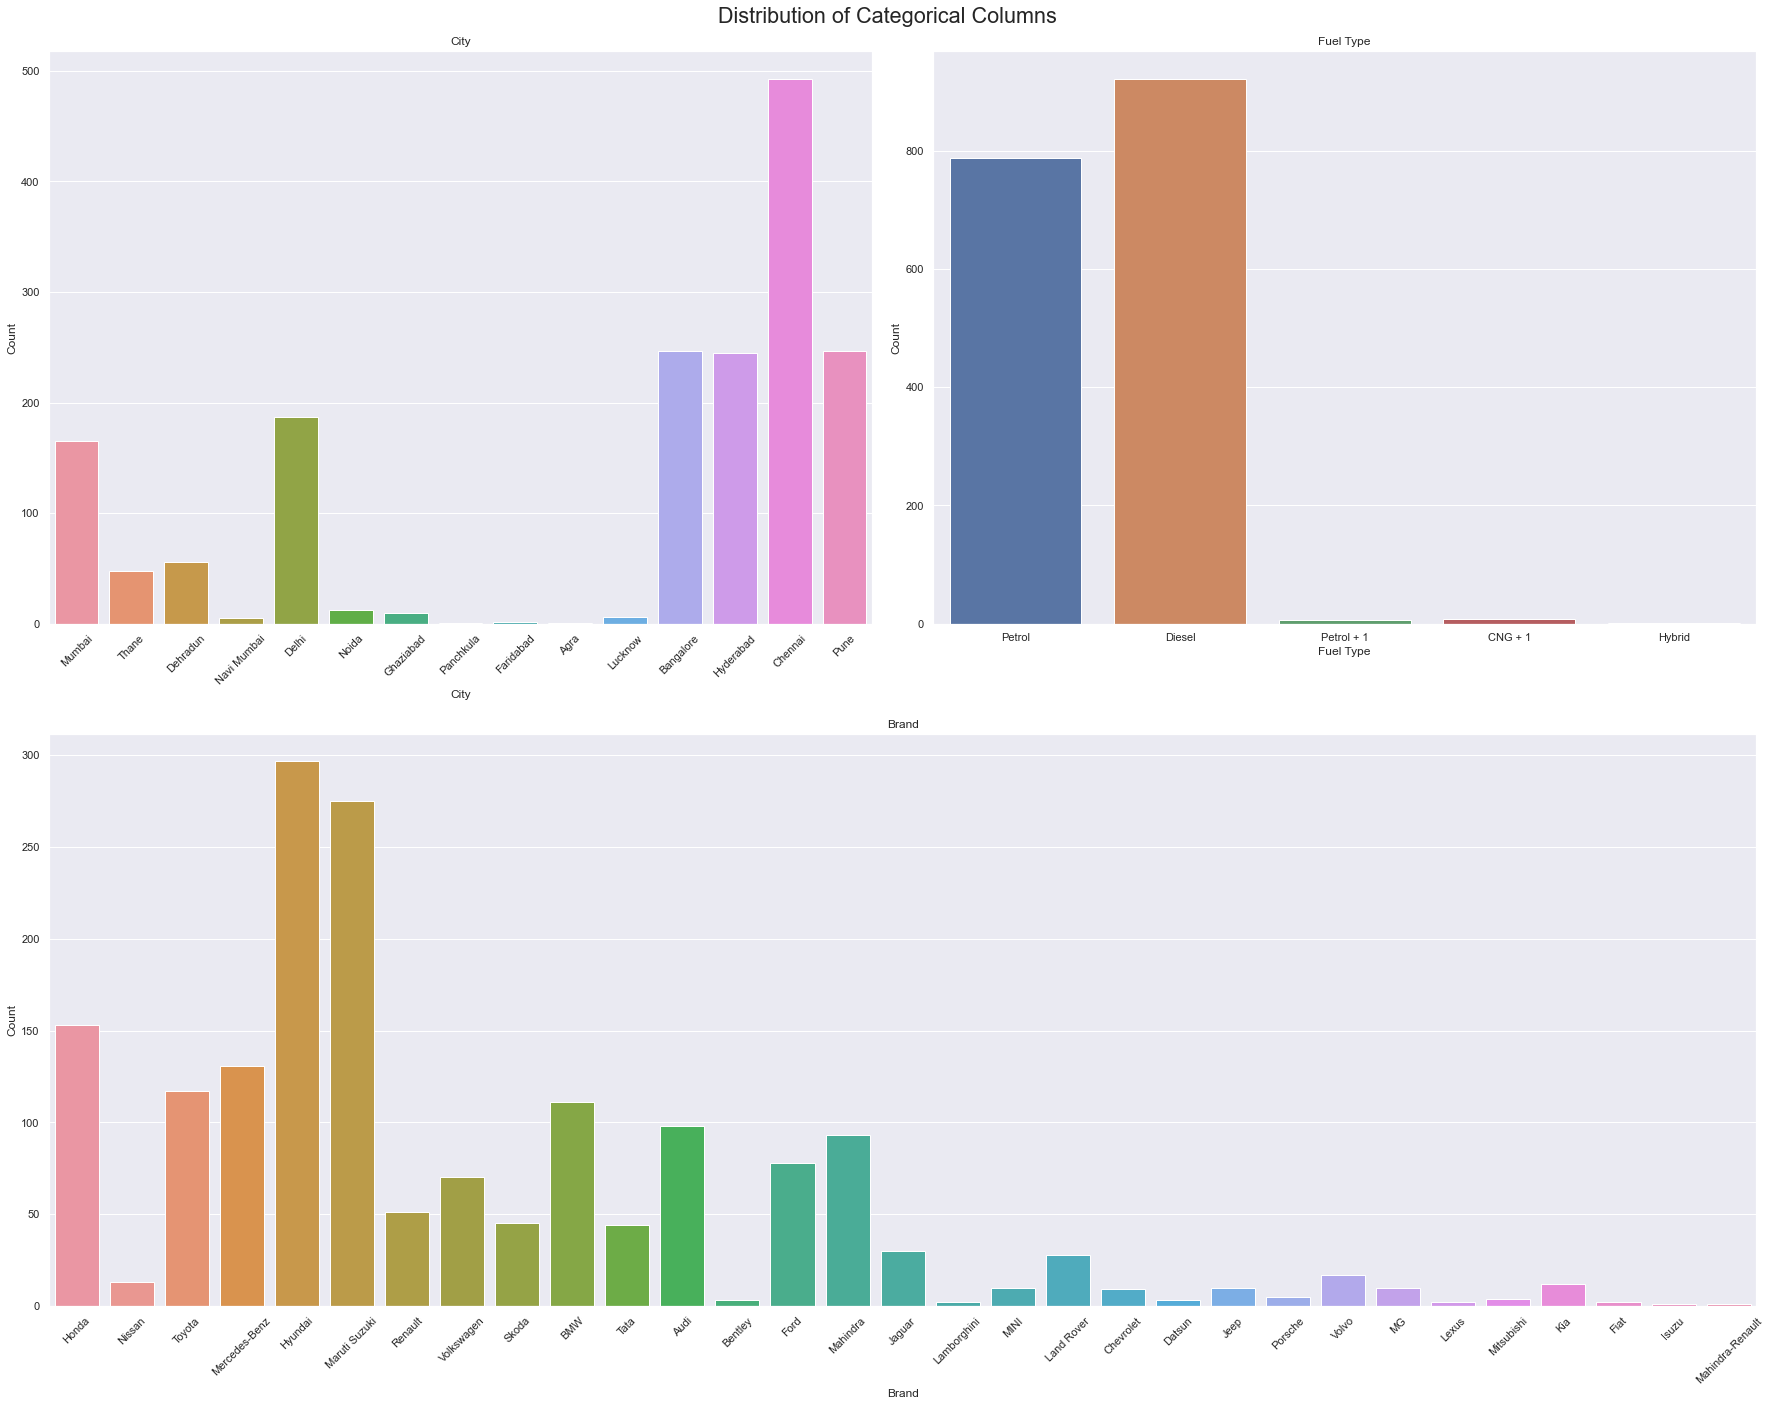

In [62]:
# distribution of all other categorical columns
categ_data = cars_dataframe.loc[:, ['brand', 'full_model_name', 'model_name', 'fuel_type', 'city']]

# draw the univerate distributions of these attributes at the same time
ax = plt.figure(figsize=(25, 20))

plt.rcParams.update({'font.size': 18})

sub1 = ax.add_subplot(221)
sns.countplot(categ_data.city)
sub1.set_xlabel('City')
sub1.set_ylabel('Count')
sub1.set_title('City')
plt.xticks(rotation=45)

sub2 = ax.add_subplot(222)
sns.countplot(categ_data.fuel_type)
sub2.set_xlabel('Fuel Type')
sub2.set_ylabel('Count')
sub2.set_title('Fuel Type')

sub3 = ax.add_subplot(212)
sns.countplot(categ_data.brand)
sub3.set_xlabel('Brand')
sub3.set_ylabel('Count')
sub3.set_title('Brand')
plt.xticks(rotation=45)

plt.suptitle("Distribution of Categorical Columns")
plt.tight_layout()
plt.show()

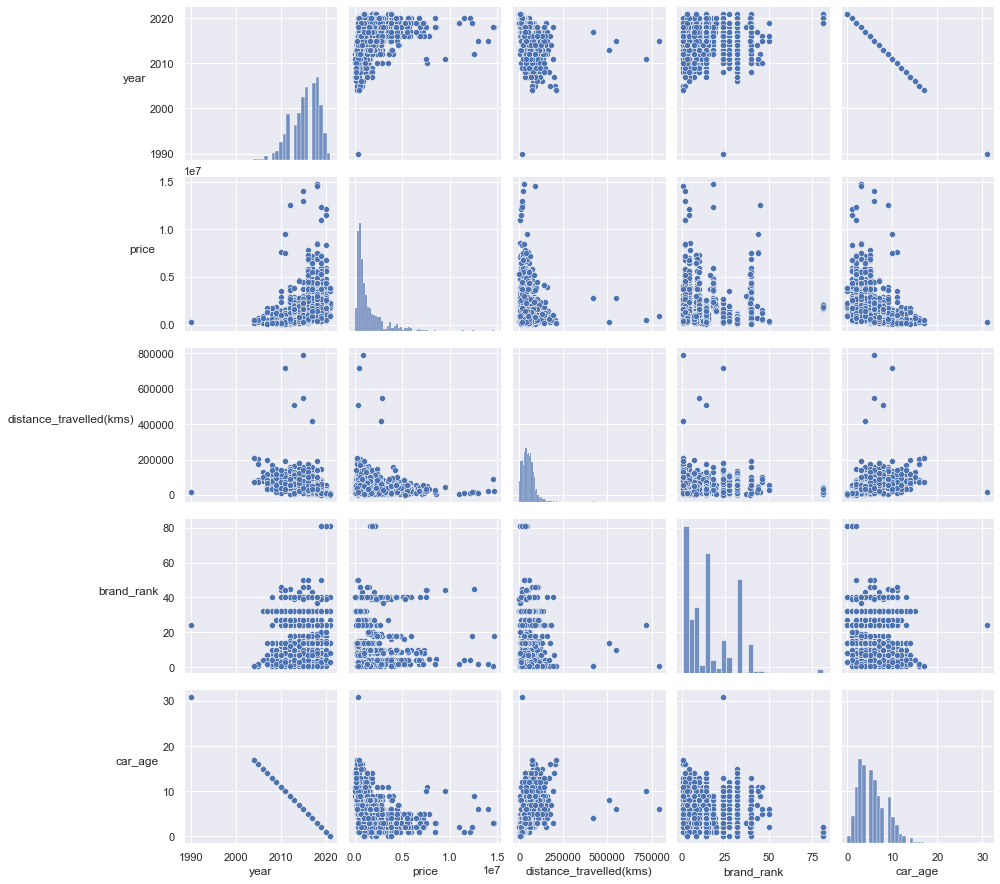

In [63]:
# Multivariate Analysis
# draw the pair plot include all numerical columns (except for ID) in the dataframe
sns.set()
tips = sns.load_dataset("tips")
pairplot_frame = cars_dataframe.iloc[:, 1:]
g = sns.pairplot(pairplot_frame, kind='scatter')
for axes in g.axes.flat:
    axes.set_ylabel(axes.get_ylabel(), rotation=0, horizontalalignment='right')
plt.show()

From the pairplot above, we can tell columns year and car_age are strongly negatively correlated

<AxesSubplot:>

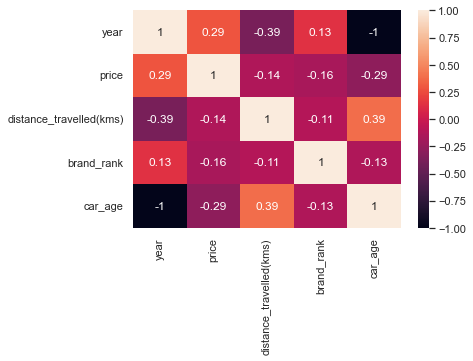

In [64]:
# draw the correlation heatmap of all numerical columns (except for ID) in the dataframe
sns.heatmap(pairplot_frame.corr(), vmin=-1, vmax=1, annot=True)

## Layout Regression Experiment Space

In [65]:
# preprocessing the dataset
import copy
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder

# make copy of all features (columns) in the dataframe
reg_expr_space = copy.deepcopy(cars_dataframe)

# divide the dataset into feature space and target variable
X = reg_expr_space.drop(columns=['price'], axis=1)
y = reg_expr_space.price

In [66]:
# first drop off the column ID, it will not help to make predictions
X = X.drop(columns=['Id'], axis=1)

# then drop car_age, it is highly correlated with year
X = X.drop(columns=['car_age'], axis=1)

# the year could be replaced with the no of year until now
X['current_year'] = 2023
X['no_year'] = X['current_year'] - X['year']
X = X.drop(columns=['year', 'current_year'], axis=1)

# Apply LabelEncoder for brand, fuel_type and city these three columns
cols = ['brand', 'fuel_type', 'city']
X[cols] = X[cols].apply(LabelEncoder().fit_transform)

# for high cardianlity features, since we have the target variable price, use it to encode 
# the column fit full_model_name and model_name
tar_enc = TargetEncoder(cols=['full_model_name', 'model_name'])

X = tar_enc.fit_transform(X, reg_expr_space.price)

In [67]:
X.head()

,brand,full_model_name,model_name,distance_travelled(kms),fuel_type,city,brand_rank,no_year
0,7,1.226074e+06,1.082439e+06,9680.0,3,9,7,7
1,23,1.342632e+06,1.314074e+06,119120.0,1,9,11,11
2,28,1.703582e+06,1.940825e+06,64593.0,1,14,1,6
3,21,1.993140e+06,2.491087e+06,25000.0,1,9,2,6
4,8,1.339692e+06,9.210450e+05,23800.0,1,9,14,11


## Publish the performance of all the models on the same hold-out/test dataset.

In [68]:
# installing necessary libraries
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer

# split the dataset
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [69]:
reg = LinearRegression()
start = time.time()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
stop = time.time()
duration = stop - start

print('Linear Regression\n')
reg_r2_score = r2_score(y_test, y_pred)
print('R2 score: ', reg_r2_score)
err = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', err)
print('Time to compute: ', duration, ' seconds')

linear_reg = ('Linear Regression', reg_r2_score, err, duration)

Linear Regression

R2 score:  0.9443784499083729
Root Mean Squared Error:  432113.77744754107
Time to compute:  0.0022377967834472656  seconds


### K-Nearest Neighbors Regressor

In [70]:
params = {
    'n_neighbors': [3,4,5,6,7,8,9,10,11,12], #'n_neighbors': [3,4,5,6,7,8,9,10,11,12], Number of neighbor points to consider for prediction
    'weights': ['uniform', 'distance'],      #'weights': ['uniform', 'distance'], weight function used in prediction
    'p': [1, 2]                              # p=1 compute manhattan distance, p=2 compute euclidean distance
}
knn = KNeighborsRegressor()
rs = GridSearchCV(estimator=knn, param_grid=params, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
rs.fit(X_train, y_train)
print(rs.best_estimator_)
knn = rs.best_estimator_
start = time.time()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
stop = time.time()
duration = stop - start

knn_r2_score = r2_score(y_test, y_pred)
print('R2 score: ', knn_r2_score)
err = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', err)
print('Time to compute: ', duration, ' seconds')

knn_reg = ('KNN', knn_r2_score, err, duration)

KNeighborsRegressor(n_neighbors=7, weights='distance')
R2 score:  0.9668406928779356
Root Mean Squared Error:  333640.9070263604
Time to compute:  0.0039997100830078125  seconds


### Decision Tree Regressor

In [71]:
params = {'max_depth': np.linspace(1, 10, 10), # The maximum depth of the tree
          'max_features': ['auto', 'sqrt'], #The number of features to consider when looking for the best split
          'min_samples_leaf': [3,4,5,6,7,8], # The minimum number of samples required to be at a leaf node
          'min_samples_split': np.linspace(0.1, 1.0, 10), #The minimum number of samples required to split an internal node
          'criterion': ['mse'] #The function to measure the quality of a split
         }

tree = DecisionTreeRegressor()
rs = GridSearchCV(estimator=tree, param_grid=params, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
rs.fit(X_train, y_train)
print(rs.best_estimator_)

tree = rs.best_estimator_
start = time.time()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
stop = time.time()
duration = stop - start

tree_r2_score = r2_score(y_test, y_pred)
print('R2 score: ', tree_r2_score)
err = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', err)
print('Time to compute: ', duration, ' seconds')

decision_tree = ('Tree', tree_r2_score, err, duration)

DecisionTreeRegressor(criterion='mse', max_depth=8.0, max_features='auto',
                      min_samples_leaf=5, min_samples_split=0.1)
R2 score:  0.9108068734745963
Root Mean Squared Error:  547195.1802696185
Time to compute:  0.002048492431640625  seconds


### Random Forest Regressor

In [72]:
params = { 
          'n_estimators': [1000],
          'max_depth': [4,5,6,7,8,9],        
          'max_features': ['auto', 'sqrt'],  
          'min_samples_leaf': [2,3,4,5,6,7], 
          'min_samples_split' : [0.01],
         }

rf = RandomForestRegressor()
rs = GridSearchCV(estimator=rf, param_grid=params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rs.fit(X_train, y_train)
print(rs.best_estimator_)

rf = rs.best_estimator_
start = time.time()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
stop = time.time()
duration = stop - start

rf_r2_score = r2_score(y_test, y_pred)
print('R2 score: ', rf_r2_score)
err = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', err)
print('Time to compute: ', duration, ' seconds')

random_forest = ('Random Forest', rf_r2_score, err, duration)

RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=0.01,
                      n_estimators=1000)
R2 score:  0.9703080927696135
Root Mean Squared Error:  315715.29138877906
Time to compute:  2.4259896278381348  seconds


## Publish the performance of all the models on the same hold-out/test dataset

### Results: which is the best model? 

Two metrics will be used to measure the goodness of the best model:
* highest R^2 score
* lowest root mean squared error

In [73]:
final_results = pd.DataFrame([linear_reg, knn_reg, decision_tree, random_forest],
                             columns=['model', 'R2', 'RMSE', 'comp_time'])
final_results.sort_values('R2', ascending=False)

,model,R2,RMSE,comp_time
3,Random Forest,0.970308,315715.291389,2.425990
1,KNN,0.966841,333640.907026,0.004000
0,Linear Regression,0.944378,432113.777448,0.002238
2,Tree,0.910807,547195.180270,0.002048


Considering about R2 score and RMSE these two metrics, the Random Forest performs the best among these four models, but it took the longest time to make predictions. 

Alternatively, other models took relative short time but peforms relative worse on R2 and RMSE these two metrics.

## List out the most important features determining the price of used cars

In [82]:
# for each model, check their most important features
from sklearn.inspection import permutation_importance

# the order of features used for making predictions
features = ['brand', 'full_model_name', 'model_name', 'distance_travelled(kms)', 'fuel_type',
            'city', 'brand_rank', 'no_year']
models = [reg, knn, tree, rf]
scores_list = []
for mod in models:
    results = permutation_importance(mod, X, y, scoring='r2')
    importance_list = results.importances_mean
    # keep each element 5 decimals
    importance_list = ['%.5f' % elem for elem in importance_list]
    scores_list.append(importance_list)

In [84]:
# create dataframe to show importantance of features in different models (using R2 scores)
model_names = ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest']
feature_importance_results = pd.DataFrame(scores_list,columns=features, index=model_names)
feature_importance_results

,brand,full_model_name,model_name,distance_travelled(kms),fuel_type,city,brand_rank,no_year
Linear Regression,-0.00000,1.92784,0.00010,0.00009,0.00161,0.00021,0.00002,0.00127
KNN,0.00000,1.10567,0.38586,0.03255,0.00000,0.00000,0.00001,0.00000
Decision Tree,0.00000,1.75598,0.00017,0.00000,0.00000,0.00000,0.00072,0.00273
Random Forest,0.00055,1.83206,0.00413,0.00898,0.00033,0.00131,0.00149,0.01603


From the results above we can see the feature full_model_name scores highest in the regression tasks. 
Therefore, it is the most important feature in all four models.

Besides, in Linear Regression model, fuel_type and no_year are most important features determining prices.

In KNN model, model_name and distance_travelled(kms) are most important features determining prices.

In Decision Tree model, model_name and no_year are most important features determining prices.

In Random Forest model, model_name, no_year, city, and brand_rank are most important features determining prices.